# NAGIREDDY YAMINI - 19A1HP021

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
adv = pd.read_csv(r'Advertising.csv')

#Reads data into pandas dataframe

In [3]:
adv.info()

#Gives information about the datatypes found in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [4]:
adv = adv.dropna()

#Drops missing values from the dataset

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [6]:
adv['Day'].unique()

#Identify the column containing categorical variables

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [7]:
pd.get_dummies(adv['Day'])[0:5]

#Assign dummy variables to the data and print top 15 rows

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [8]:
categorical_features = ['Day']

In [9]:
X_features = adv.columns
print(X_features)

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day', 'Sales'], dtype='object')


In [10]:
X_features = X_features.drop('Sno','Sales')

In [11]:
print(X_features)

Index(['TV', 'Radio', 'Newspaper', 'Day', 'Sales'], dtype='object')


In [12]:
adv_encoded = pd.get_dummies(adv[X_features], columns = categorical_features)

In [13]:
print(adv_encoded.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')


In [14]:
adv.describe()

#Descriptive summary of all numerical variables

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [15]:
#Importing visualization packages
import seaborn as sn
import matplotlib.pyplot as plt

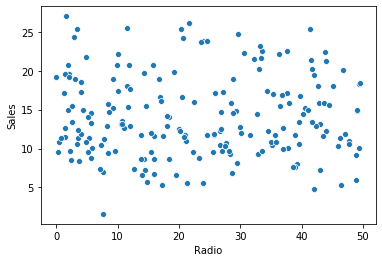

In [16]:
sn.scatterplot(x = 'Radio', y = 'Sales', data = adv) 

#Scatterplot for TV and Sales

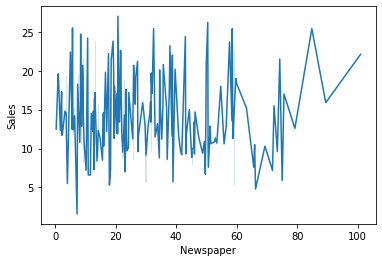

In [17]:
sn.lineplot(x = "Newspaper", y = "Sales", data = adv)
plt.show()  

#Line Plot for Radio and Sales

In [18]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant( adv_encoded )
Y = adv['Sales']
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.7, test_size = 0.3, random_state = 86 )

#Adding constand term to matrix of features, splitting dataset into training and test dataset

In [19]:
adv_model_1 = sm.OLS(train_y, train_X).fit()
adv_model_1.summary2()

#Model fitting and understanding the summary of the model

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       1.000     
Dependent Variable:   Sales              AIC:                  -7958.0496
Date:                 2020-08-25 17:42   BIC:                  -7937.6097
No. Observations:     137                Log-Likelihood:       3986.0    
Df Model:             6                  F-statistic:          1.708e+29 
Df Residuals:         130                Prob (F-statistic):   0.00      
R-squared:            1.000              Scale:                3.3010e-27
-------------------------------------------------------------------------
              Coef.  Std.Err.          t           P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
const        -0.0000   0.0000              -0.1795 0.8578 -0.0000  0.0000
TV           -0.0000   0.0000              -3.5255 0.0006 -0.0000 -0.0000
Radio        -0.0000   0.0000              -0.9897 0.3242 -0.0000  0.0000
Newspaper     0.0000   0.0000               0.8076 0.4208 -0.0000  0.0000
Sales         1.0000   0.0000 997675265275974.8750 0.0000  1.0000  1.0000
Day_Holiday  -0.0000   0.0000              -0.0845 0.9328 -0.0000  0.0000
Day_Weekdays -0.0000   0.0000              -0.1068 0.9151 -0.0000  0.0000
Day_Weekend  -0.0000   0.0000              -0.0276 0.9781 -0.0000  0.0000
-------------------------------------------------------------------------
Omnibus:             30.495     Durbin-Watson:        0.404              
Prob(Omnibus):       0.000      Jarque-Bera (JB):     6.749              
Skew:                -0.055     Prob(JB):             0.034              
Kurtosis:            1.918      Condition No.:        1796547954831637760
=========================================================================
* The condition number is large (2e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [20]:
# Multicollinearity Test

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X[:].to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

#creating VIF calculations

In [22]:
vif_factors = get_vif_factors( X[adv_encoded.columns] )
vif_factors

#Calculating VIF for the list of columns

,column,vif
0,TV,1.983566
1,Radio,1.155898
2,Newspaper,1.170206
3,Sales,1.004523
4,Day_Holiday,1.560849
5,Day_Weekdays,11.291646
6,Day_Weekend,6.883175


In [23]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

#Removing columns with VIF > 4

In [24]:
print(columns_with_large_vif)

5    Day_Weekdays
6     Day_Weekend
Name: column, dtype: object


In [25]:
columns_to_be_removed = ['Day_Weekdays']

#Choosing Day_Weekdays column as it is redundant

In [26]:
X_new_features = list( set(adv_encoded) - set(columns_to_be_removed) )

#Removing Day_Weekday column as it is redundant

In [27]:
print(X_new_features)

['TV', 'Day_Weekend', 'Sales', 'Day_Holiday', 'Radio', 'Newspaper']


In [28]:
# Model after eliminating multicollinearity

In [29]:
train_X = train_X[X_new_features]
adv_model_2 = sm.OLS(train_y, train_X).fit()
adv_model_2.summary2()

#Model fitting after VIF and removing redundant variable

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 1.000     
Dependent Variable:     Sales            AIC:                         -8467.6357
Date:                   2020-08-25 17:42 BIC:                         -8450.1159
No. Observations:       137              Log-Likelihood:              4239.8    
Df Model:               6                F-statistic:                 6.290e+31 
Df Residuals:           131              Prob (F-statistic):          0.00      
R-squared (uncentered): 1.000            Scale:                       8.0585e-29
---------------------------------------------------------------------------------
                Coef.   Std.Err.            t            P>|t|    [0.025   0.975]
---------------------------------------------------------------------------------
TV             -0.0000    0.0000                -3.4656  0.0007  -0.0000  -0.0000
Day_Weekend    -0.0000    0.0000                -0.7110  0.4783  -0.0000   0.0000
Sales           1.0000    0.0000  8253038452217119.0000  0.0000   1.0000   1.0000
Day_Holiday     0.0000    0.0000                 0.2687  0.7886  -0.0000   0.0000
Radio          -0.0000    0.0000                -1.6383  0.1038  -0.0000   0.0000
Newspaper      -0.0000    0.0000                -6.1043  0.0000  -0.0000  -0.0000
--------------------------------------------------------------------------------
Omnibus:                   2.666             Durbin-Watson:                1.939
Prob(Omnibus):             0.264             Jarque-Bera (JB):             2.000
Skew:                      0.127             Prob(JB):                     0.368
Kurtosis:                  2.466             Condition No.:                1534 
================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [30]:
# Residual analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();
    
# PP Plot for checking normality assumption of residuals

<Figure size 576x432 with 0 Axes>

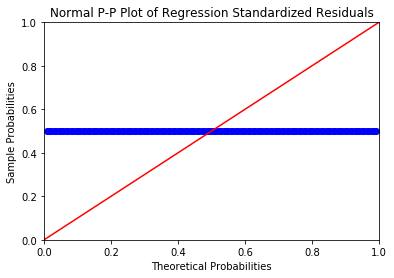

In [32]:
draw_pp_plot( adv_model_2, "Normal P-P Plot of Regression Standardized Residuals");

#Plotting graph for PP plot

In [33]:
k = train_X.shape[1]
n = train_X.shape[0]

print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 6  and number of observations: 137


In [34]:
k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 6  and number of observations: 137
Cutoff for leverage value:  0.153


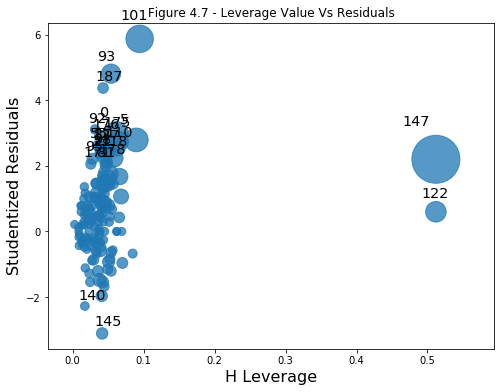

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( adv_model_2, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

In [36]:
adv[adv.index.isin( [147, 122] )]

,Sno,TV,Radio,Newspaper,Day,Sales
122,123,224.0,2.4,15.6,Holiday,8.5
147,148,243.2,49.0,44.3,Holiday,15.0


In [37]:
train_X_new = train_X.drop( [122, 147], axis = 0)
train_y_new = train_y.drop( [122, 147], axis = 0)

In [38]:
import numpy as np
train_y = np.sqrt( train_y )

In [39]:
adv_model_3 = sm.OLS(train_y, train_X).fit()
adv_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.984    
Dependent Variable:     Sales            AIC:                         194.3149 
Date:                   2020-08-25 17:42 BIC:                         211.8348 
No. Observations:       137              Log-Likelihood:              -91.157  
Df Model:               6                F-statistic:                 1362.    
Df Residuals:           131              Prob (F-statistic):          2.00e-115
R-squared (uncentered): 0.984            Scale:                       0.23170  
-----------------------------------------------------------------------------------
                 Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
TV               0.0037       0.0006      5.7143     0.0000      0.0024      0.0050
Day_Weekend     -0.3925       0.1340     -2.9299     0.0040     -0.6575     -0.1275
Sales            0.1957       0.0065     30.1233     0.0000      0.1829      0.2086
Day_Holiday     -0.1377       0.3545     -0.3886     0.6982     -0.8389      0.5635
Radio            0.0092       0.0030      3.1204     0.0022      0.0034      0.0151
Newspaper        0.0045       0.0022      2.0643     0.0410      0.0002      0.0089
-------------------------------------------------------------------------------
Omnibus:                  10.584            Durbin-Watson:               1.662 
Prob(Omnibus):            0.005             Jarque-Bera (JB):            11.113
Skew:                     -0.694            Prob(JB):                    0.004 
Kurtosis:                 3.142             Condition No.:               1534  
===============================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

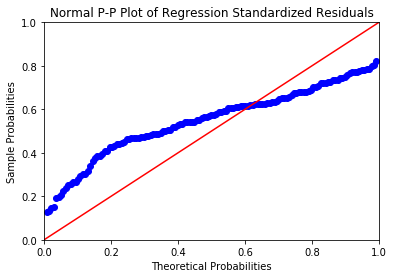

In [40]:
draw_pp_plot( adv_model_3,"Normal P-P Plot of Regression Standardized Residuals");

In [41]:
pred_y = np.power(adv_model_3.predict( test_X[train_X.columns] ), 2)

In [42]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

3.8643207320501776

In [43]:
#considering the coefficients obtained from model 2
#NMLR equation:Y = Ratio(X1) + Newspaper(X2) + TV(X3) + Day_Weekend(X4) + Day_Holiday(X5)

#Y = (0.1409*35.8) + (0.0621*44.6) + (0.0609*13.2) + (-6.8142*1) + (-7.9553*0)
#Y = 1.80356
#Predicted sales